In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import read_txz as txz

In [ ]:
target_file = 'household_structure_dynamic.csv.xz'

In [ ]:
def get_dfs(cat, target_file):
    ds = [1]#, 2, 3]
    #group_fs = { dd:{} for dd in ds }
    dfs = {1:None, 2:None, 3:None}
    for dd in ds:
        basedir = '_run_output_c{}'.format(str(dd))
        pdirs = sorted(os.listdir(os.path.join(basedir, cat)))
        #print(pdirs)
        for pdir in pdirs:
            pset = pdir.split('_')[-1]
            #print(pset)
            seeds = sorted(os.listdir(os.path.join(basedir, cat, pdir)))
            #print(seeds)
            for sr in seeds:
                fp = os.path.join(basedir, cat, pdir, sr, target_file)
                #print(fp)
                seed = sr.split('_')[2]
                df = pd.read_csv(fp)
                df['prob'] = float(pset)
                df['seed'] = seed
                df['detail_level'] = dd
                df['both_age'] = df['male'] + df['female']
                df['age_group'] = [ int(a/5)*5 for a in df['age'] ]
                #print(df.head())
                if dfs[dd] is None:
                    dfs[dd] = df
                else:
                    dfs[dd] = dfs[dd].append(df)
                #print(len(dfs[dd]))
            #break
        #break
    return dfs

In [ ]:
cats = ['couple_prob', 'divorce_prob', 'leaving_prob']

cat = cats[0]
dfs = get_dfs(cat, target_file)
dfs[1].head()

In [6]:
group_fs['couple_prob'].keys()

dict_keys([1, 2, 3])

In [7]:
group_fs['couple_prob'][1].keys()

dict_keys(['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'])

In [8]:
cat = 'couple_prob'
df_couple = {1:None, 2:None, 3:None}
for dlvl, probs in group_fs[cat].items():
    this_df = None
    #print(probs)
    for catp, v in probs.items():
        for f in v:
            fp = os.path.join(basedir, f)
            ff = f.split('-')
            seed = ff[3].split('_')[2]
            df = txz.read_df_from_txz(fp, 'household_structure_dynamic.csv')
            df['detail_level'] = dlvl
            df[cat] = float(catp)
            df['seed'] = seed
            if this_df is None:
                this_df = df
            else:
                this_df = this_df.append(df)
    df_couple[dlvl] = this_df
    print(dlvl)

1
2
3


In [9]:
df_couple[1].head()

,ind,time,type_0,type_1,type_2,type_3,type_4,type_5,type_6,type_7,detail_level,couple_prob,seed
0,0,0,331,4,1113,626,121,1634,637,0,1,0.0,s152745
1,1,1,302,5,1174,656,118,1607,637,0,1,0.0,s152745
2,2,2,258,9,1283,674,117,1574,637,0,1,0.0,s152745
3,3,3,227,18,1388,716,115,1520,621,0,1,0.0,s152745
4,4,4,195,25,1476,763,111,1478,611,0,1,0.0,s152745


Text(0.0, 1.0, '(c) detail floating 3 digit, type_0')

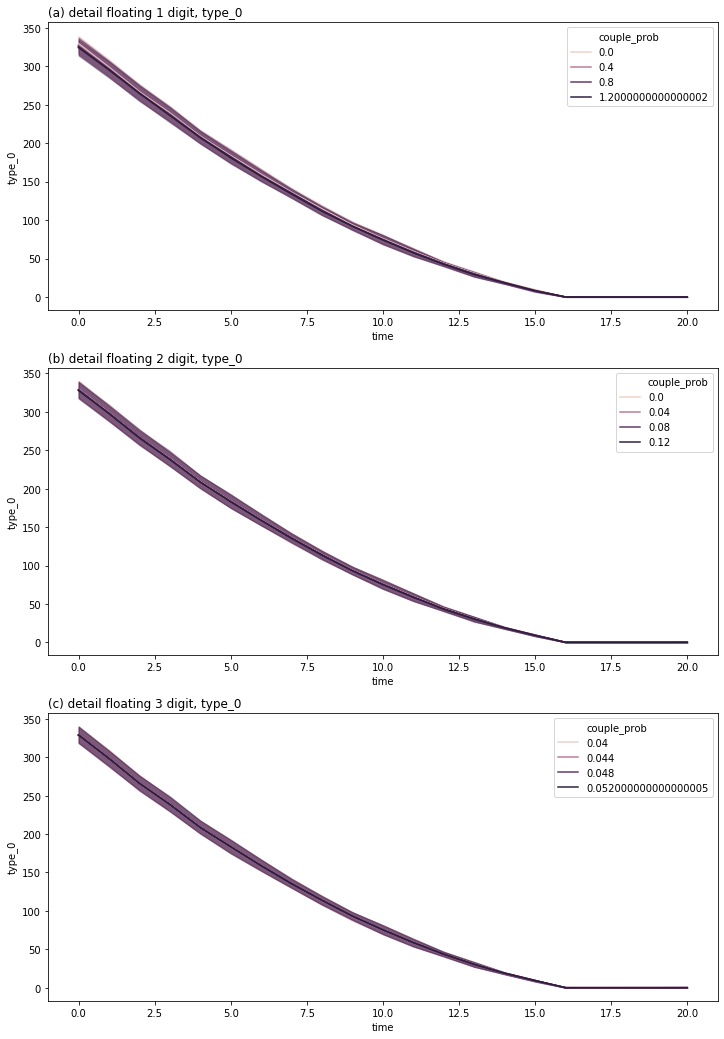

In [10]:
fig, axs = plt.subplots(3, 1, figsize=(12,18))

col = 'type_0'

sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[1], ax=axs[0])
axs[0].set_title('(a) detail floating 1 digit, {}'.format(col), loc='left')
sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[2], ax=axs[1])
axs[1].set_title('(b) detail floating 2 digit, {}'.format(col), loc='left')
sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[3], ax=axs[2])
axs[2].set_title('(c) detail floating 3 digit, {}'.format(col), loc='left')

Text(0.0, 1.0, '(c) detail floating 3 digit, type_1')

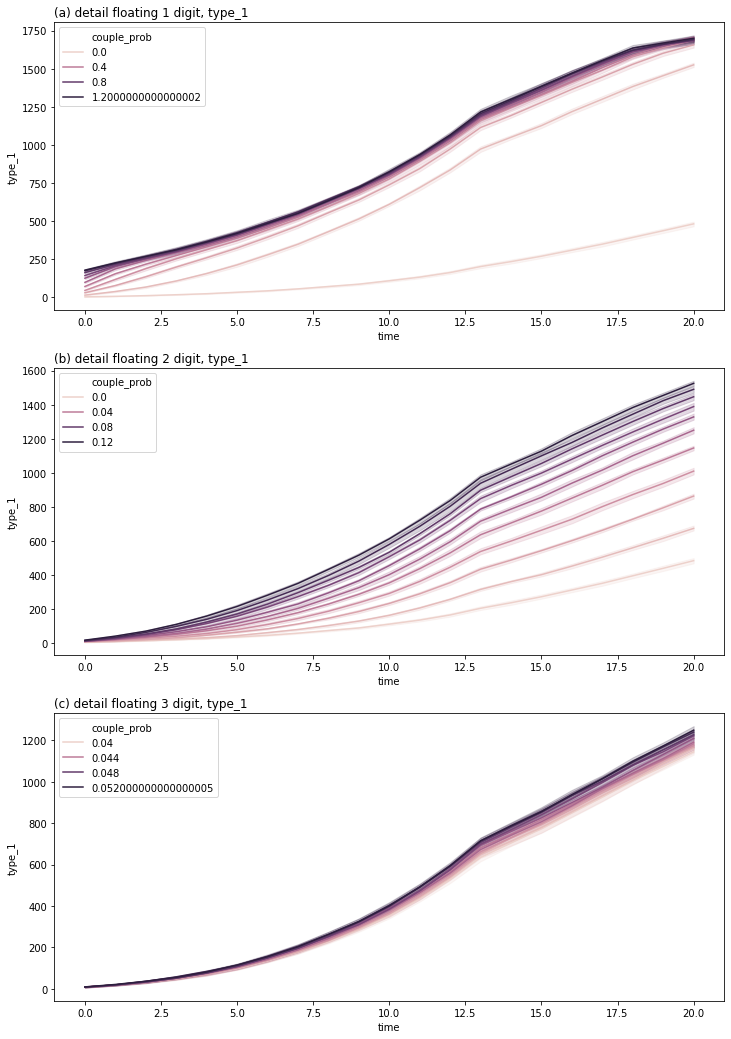

In [11]:
fig, axs = plt.subplots(3, 1, figsize=(12,18))

col = 'type_1'

sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[1], ax=axs[0])
axs[0].set_title('(a) detail floating 1 digit, {}'.format(col), loc='left')
sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[2], ax=axs[1])
axs[1].set_title('(b) detail floating 2 digit, {}'.format(col), loc='left')
sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[3], ax=axs[2])
axs[2].set_title('(c) detail floating 3 digit, {}'.format(col), loc='left')

Text(0.0, 1.0, '(c) detail floating 3 digit, type_2')

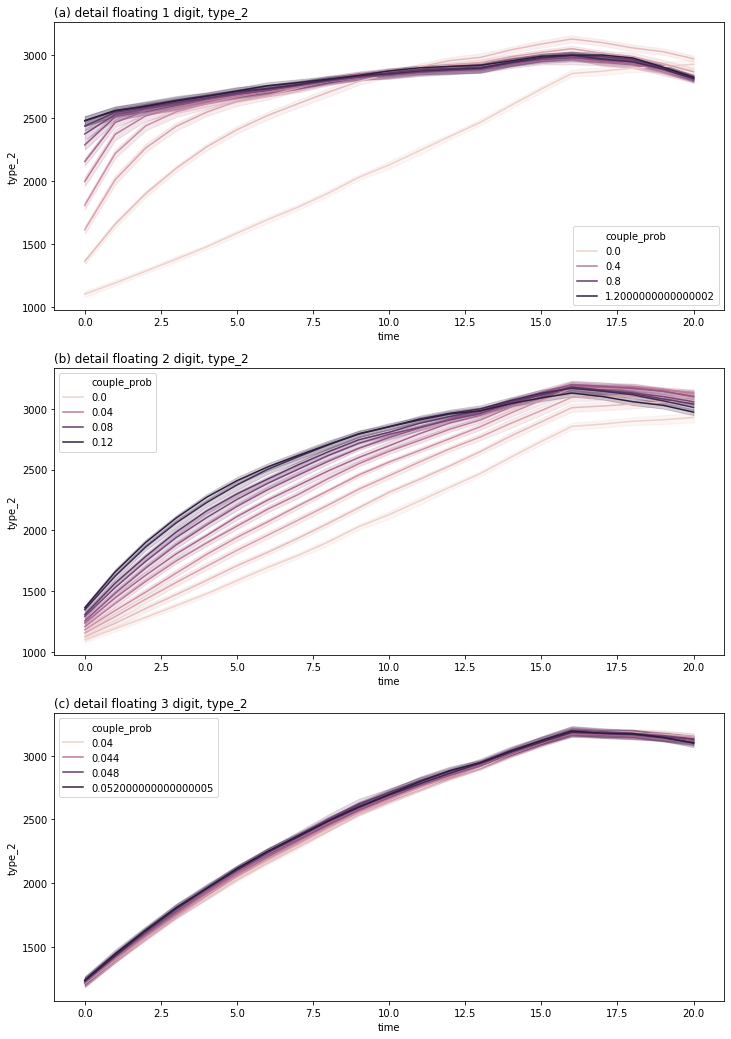

In [12]:
fig, axs = plt.subplots(3, 1, figsize=(12,18))

col = 'type_2'

sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[1], ax=axs[0])
axs[0].set_title('(a) detail floating 1 digit, {}'.format(col), loc='left')
sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[2], ax=axs[1])
axs[1].set_title('(b) detail floating 2 digit, {}'.format(col), loc='left')
sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[3], ax=axs[2])
axs[2].set_title('(c) detail floating 3 digit, {}'.format(col), loc='left')

Text(0.0, 1.0, '(c) detail floating 3 digit, type_3')

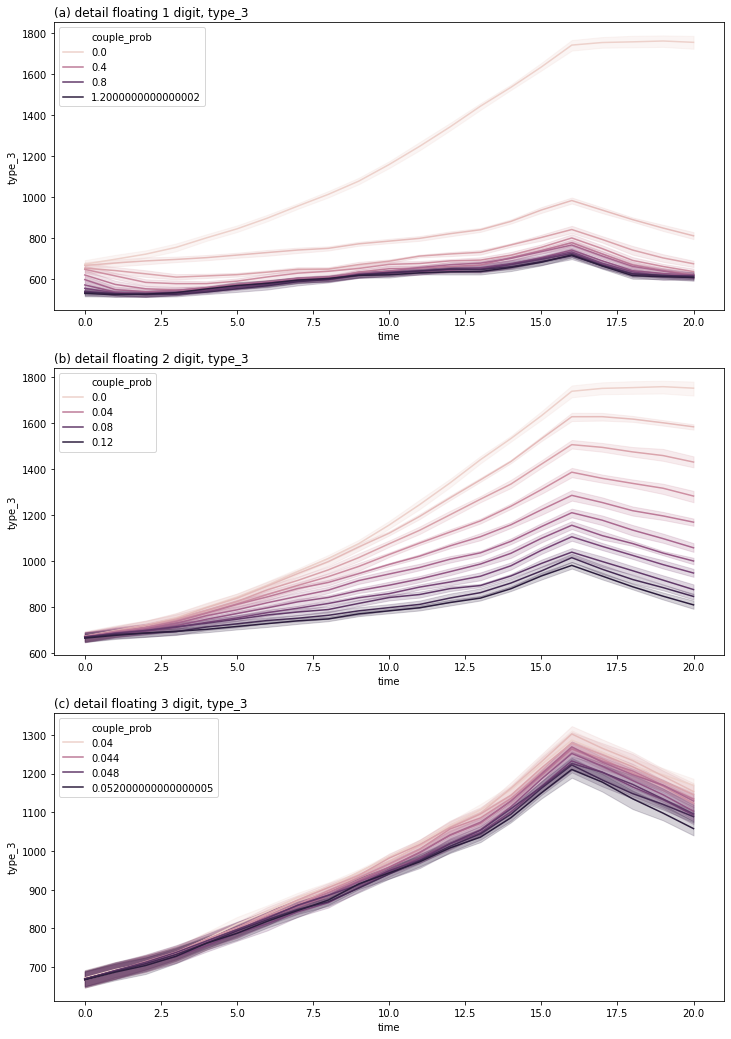

In [13]:
fig, axs = plt.subplots(3, 1, figsize=(12,18))

col = 'type_3'

sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[1], ax=axs[0])
axs[0].set_title('(a) detail floating 1 digit, {}'.format(col), loc='left')
sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[2], ax=axs[1])
axs[1].set_title('(b) detail floating 2 digit, {}'.format(col), loc='left')
sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[3], ax=axs[2])
axs[2].set_title('(c) detail floating 3 digit, {}'.format(col), loc='left')

Text(0.0, 1.0, '(c) detail floating 3 digit, type_4')

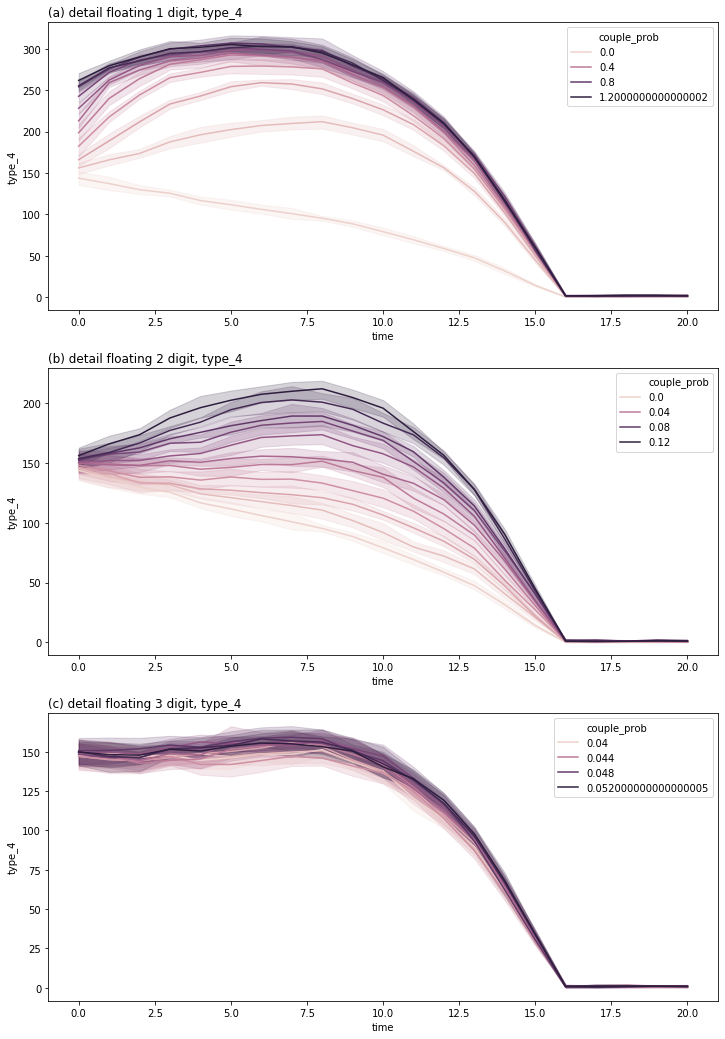

In [17]:
fig, axs = plt.subplots(3, 1, figsize=(12,18))

col = 'type_4'

sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[1], ax=axs[0])
axs[0].set_title('(a) detail floating 1 digit, {}'.format(col), loc='left')
sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[2], ax=axs[1])
axs[1].set_title('(b) detail floating 2 digit, {}'.format(col), loc='left')
sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[3], ax=axs[2])
axs[2].set_title('(c) detail floating 3 digit, {}'.format(col), loc='left')

Text(0.0, 1.0, '(c) detail floating 3 digit, type_5')

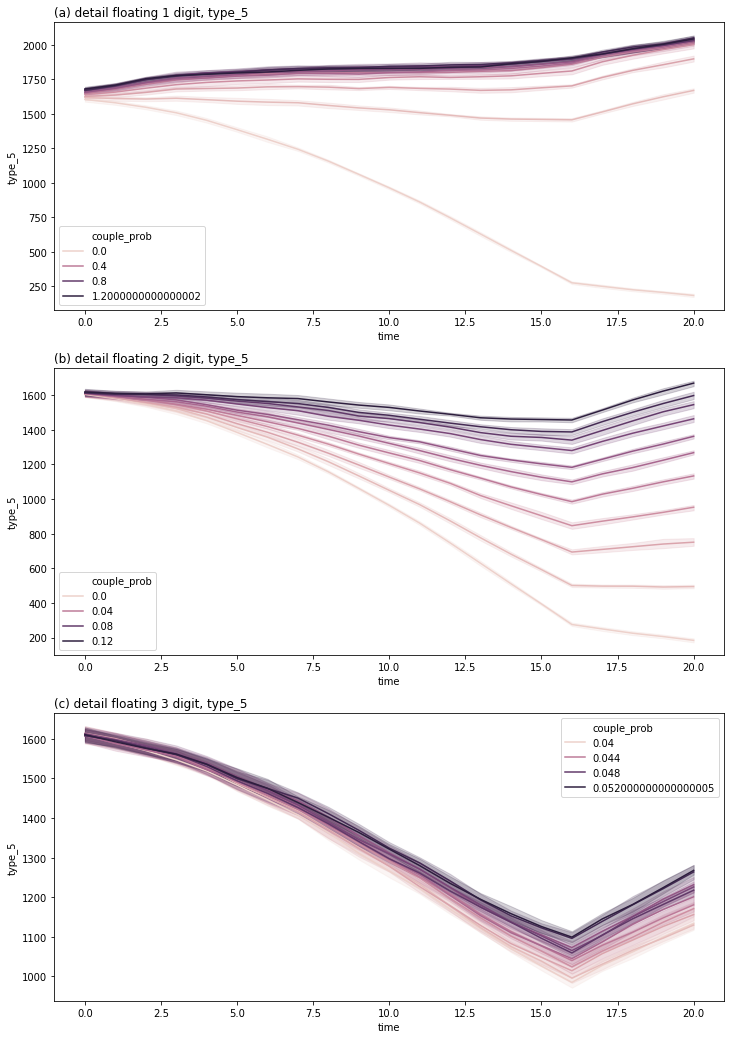

In [15]:
fig, axs = plt.subplots(3, 1, figsize=(12,18))

col = 'type_5'

sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[1], ax=axs[0])
axs[0].set_title('(a) detail floating 1 digit, {}'.format(col), loc='left')
sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[2], ax=axs[1])
axs[1].set_title('(b) detail floating 2 digit, {}'.format(col), loc='left')
sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[3], ax=axs[2])
axs[2].set_title('(c) detail floating 3 digit, {}'.format(col), loc='left')

Text(0.0, 1.0, '(c) detail floating 3 digit, type_6')

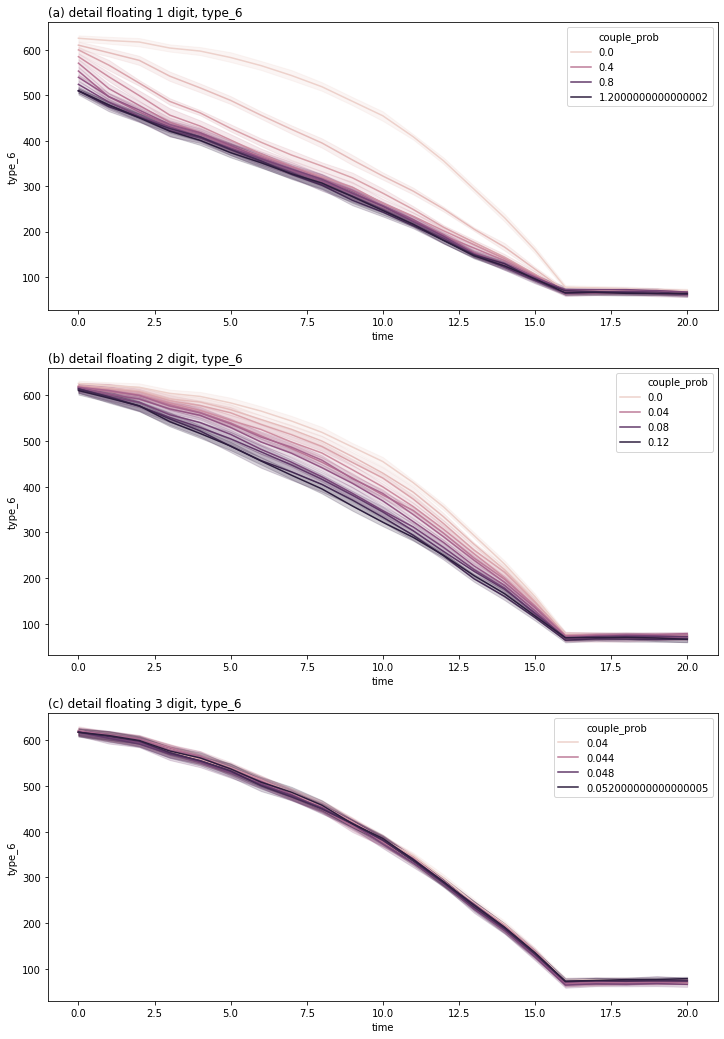

In [16]:
fig, axs = plt.subplots(3, 1, figsize=(12,18))

col = 'type_6'

sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[1], ax=axs[0])
axs[0].set_title('(a) detail floating 1 digit, {}'.format(col), loc='left')
sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[2], ax=axs[1])
axs[1].set_title('(b) detail floating 2 digit, {}'.format(col), loc='left')
sns.lineplot(x='time', y=col, hue='couple_prob', data=df_couple[3], ax=axs[2])
axs[2].set_title('(c) detail floating 3 digit, {}'.format(col), loc='left')